# Les arbres de decision 
## Objectif

1.  Comprendre l'algorithme des Arbres de décision
2.  Comprendre la mésure de selection d'attributs:
> *   Information Gain
> *   Gain Ratio
> *   Gini index
3.  Créer un arbre de decision en utilisant Scikit-learn
4.  Utilisation des differentes metriques pour l'évaluation d'un modèle
4.  Optimiser les performance d'un arbre de decision

## Introduction
Un arbre de décision est une structure arborescente semblable à un organigramme où un **nœud interne** représente une caractéristique (ou un attribut), la branche représente une règle de décision et chaque **nœud feuille** représente le résultat. Le nœud le plus élevé dans un arbre de décision est connu sous le nom de **nœud racine**. 

Un arbre de décision est facile à comprendre et à interpréter car il apprend à partitionner sur la base de la valeur d'attribut. Il partitionne l'arborescence de manière récursive en appelant le partitionnement récursif. Cette structure de type organigramme vous aide à prendre des décisions. C'est une visualisation comme un diagramme d'organigramme qui imite facilement la pensée au niveau humain. C'est pourquoi les arbres de décision sont faciles à comprendre et à interpréter. 
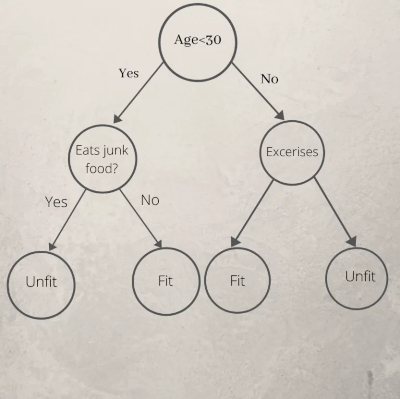

## Algorithme
1.  Sélectionnez le meilleur attribut à l'aide des mesures de sélection d'attribut (ASM) pour fractionner les enregistrements. 
2. Faire de cet attribut le nœud de décision et divisez l'ensemble de données en sous-ensembles plus petits.
3. Répéter ce processus de manière récursive pour chaque nœud enfant jusqu'à ce que l'une des conditions corresponde: 
>- Tous les tuples appartiennent à la même valeur d'attribut.
>- Il n'y a plus d'attributs restants. 
>- Il n'y a plus d'instances. 

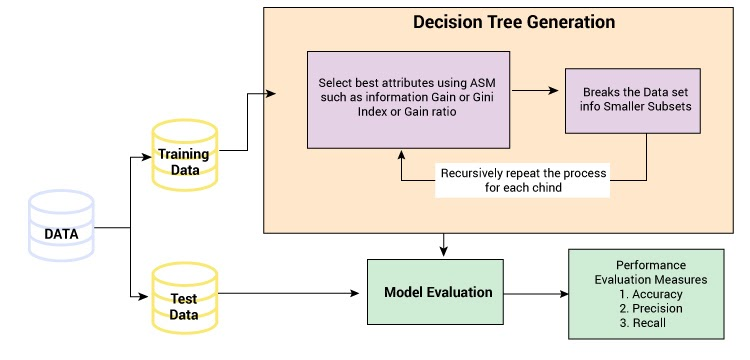

## Mesures de sélection d'attribut
La mesure de sélection d'attribut (Atribut Selection Mesure ASM) permet de sélectionner le critère de fractionnement qui partitionne les données de la meilleure manière possible. L'attribut avec le meilleur ASM sera sélectionné comme attribut de division. Dans le cas d'un attribut à valeur continue, les points de partage des branches doivent également être définis. Les mesures de sélection les plus populaires sont:
>- le gain d'information(**Information Gain**)
>- le ratio de gain (**Gain Ratio**)
>- l'indice de Gini(**Gini Index**). 

## Réferences:
https://www.analyticssteps.com/blogs/decision-tree-machine-learning


## Q1. Chargement des données
1- Construire un Dataframe ***data*** contenant les données stoker dans le fichier ***diabetes.csv***  https://www.kaggle.com/uciml/pima-indians-diabetes-database

2- visualiser ce dataframe ainsi que les diferentes mesure sur ce dataframe

In [2]:
#1
import pandas as pd
df = pd.read_csv("diabetes.csv")


In [4]:
#2
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Q2. Selection des caracteristiques
Créer les deux dataframes:
- X: le dataframe des entrée 
- y: la sortie (outcome)

In [23]:
X = df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
X


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
y = df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Q3. Partitionner ces données en X_train, X_test, y_train, y_test

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, train_size=0.8)


## Q4. Création, entrainement et évaluation du modèle
1. Utiliser le classifieur ***DecisionTreeClassifier*** du module ***sklearn.tree*** pour initialiser et entrainer un arbre de décision 
2. Afficher la matrice de confusion de ce modèle
3. Calculer les trois metrics suivante:
>- Accuracy
>- Prcison
>- recall
>- F1 score

de ce modèle (voir l'article suivant: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

#1
Tree = DecisionTreeClassifier()
Tree.fit(X_train,y_train)

#2
y_pred = Tree.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
matrix


array([[89, 21],
       [17, 27]], dtype=int64)

In [24]:
#3
TN,FP,FN,TP = matrix.ravel()

Accuracy = (TP+TN)/(TP+TN+FN+FP)
Recall = TP/TP+FN
Precision = TP/TP+FP
F1_score = (2*Precision*Recall)/(Precision+Recall)

print("L'exactitude: ",Accuracy)
print("Le recall: ",Recall)
print("La precision: ",Precision)
print("Le F1_score: ",F1_score)

L'exactitude:  0.7532467532467533
Le recall:  18.0
La precision:  22.0
Le F1_score:  19.8


## Q5. Visualisation d'un arbre de décision
1. Utiliser la fonction ***plot_tree(dt)***  de ***sklearn.tree*** pour visualiser l'arbre de décision résultante 
2. Que remarqez-vous?

[Text(1042.1672350888325, 1582.835294117647, 'Glucose <= 154.5\ngini = 0.463\nsamples = 614\nvalue = [390, 224]\nclass = 0'),
 Text(520.8014752538071, 1486.9058823529413, 'Age <= 28.5\ngini = 0.397\nsamples = 513\nvalue = [373, 140]\nclass = 0'),
 Text(302.7220812182741, 1390.9764705882353, 'Glucose <= 130.5\ngini = 0.232\nsamples = 261\nvalue = [226, 35]\nclass = 0'),
 Text(172.0736040609137, 1295.0470588235294, 'BMI <= 45.4\ngini = 0.163\nsamples = 224\nvalue = [204, 20]\nclass = 0'),
 Text(155.07868020304568, 1199.1176470588234, 'BMI <= 30.95\ngini = 0.149\nsamples = 222\nvalue = [204, 18]\nclass = 0'),
 Text(84.9746192893401, 1103.1882352941175, 'Pregnancies <= 7.5\ngini = 0.047\nsamples = 124\nvalue = [121, 3]\nclass = 0'),
 Text(67.97969543147208, 1007.2588235294118, 'Age <= 27.5\ngini = 0.032\nsamples = 123\nvalue = [121, 2]\nclass = 0'),
 Text(33.98984771573604, 911.3294117647059, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.017\nsamples = 117\nvalue = [116, 1]\nclass = 0'),
 T

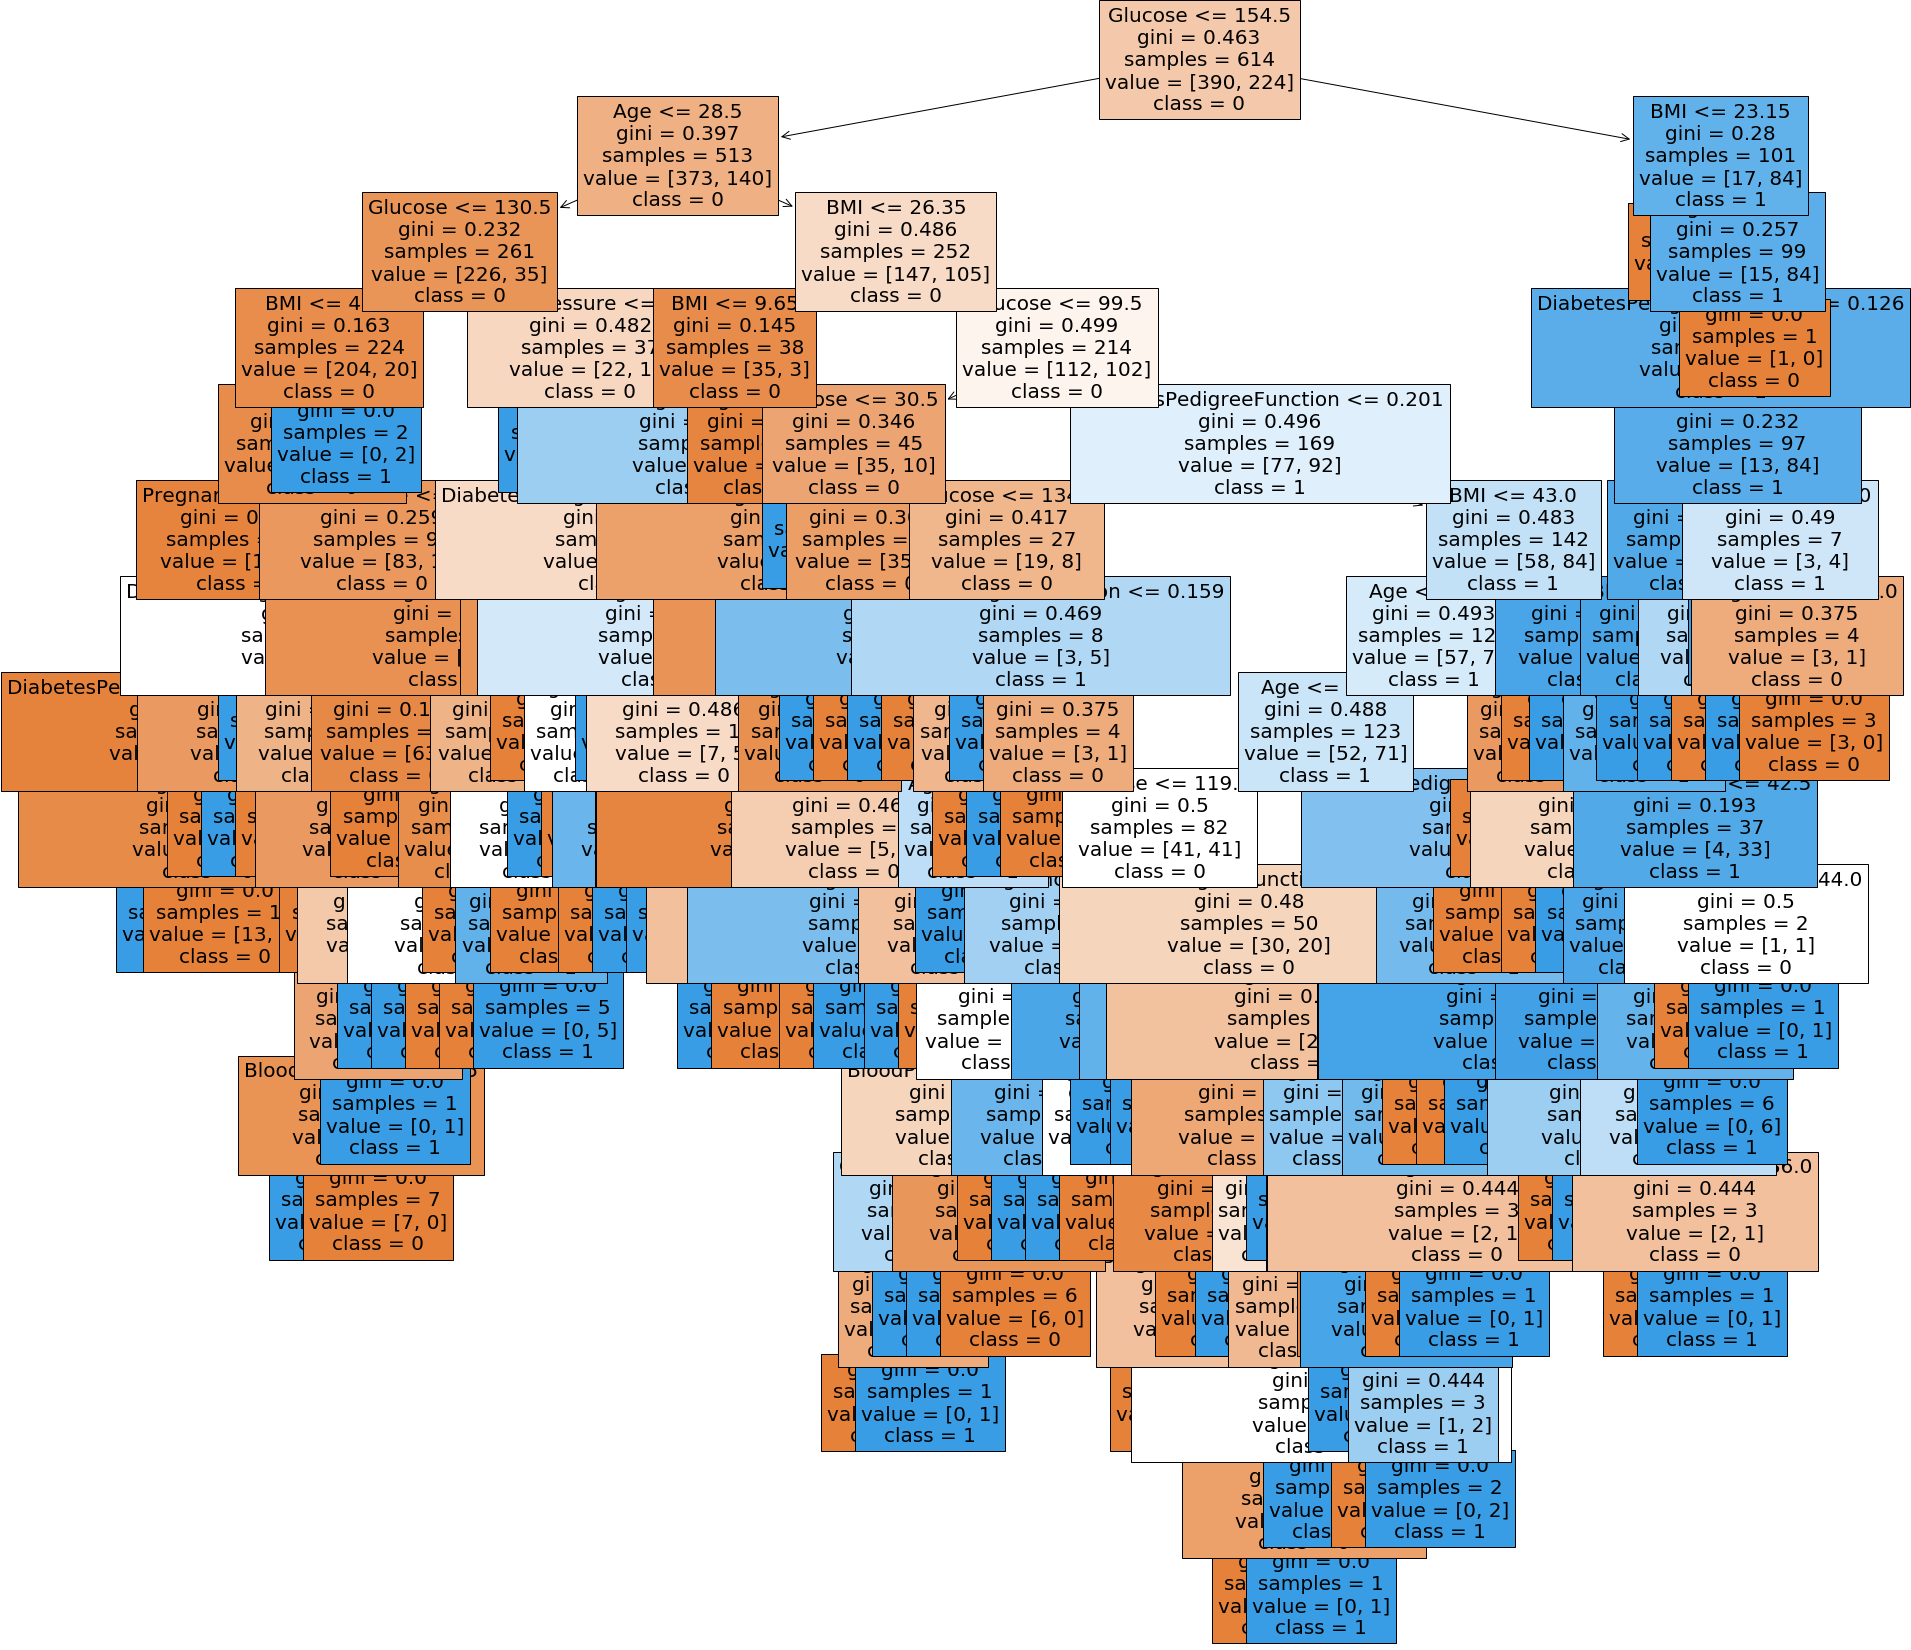

In [56]:
#1

from sklearn.tree import plot_tree
plt.figure(figsize = (30,30))
plot_tree(Tree, filled=True, fontsize= 20, feature_names= df.columns[:], class_names=['0','1'])

#2


## Q6. Optimisation les performance d'un arbre de décision
1. Créer deux arbres de décisions avec les paramétres suivants:
>- Arbre 1: ( ASM = entropy , max_depth: 3)
>- Arbre 2: ( ASM = gini , max_depth: 3)

> NB: utiliser la documentation https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

2. Comparer les resultats avec celles de la question Q5

[Text(837.0, 1426.95, 'Glucose <= 154.5\nentropy = 0.947\nsamples = 614\nvalue = [390, 224]\nclass = 0'),
 Text(418.5, 1019.25, 'BMI <= 26.35\nentropy = 0.846\nsamples = 513\nvalue = [373, 140]\nclass = 0'),
 Text(209.25, 611.55, 'Pregnancies <= 2.5\nentropy = 0.212\nsamples = 119\nvalue = [115, 4]\nclass = 0'),
 Text(104.625, 203.8499999999999, 'entropy = 0.0\nsamples = 65\nvalue = [65, 0]\nclass = 0'),
 Text(313.875, 203.8499999999999, 'entropy = 0.381\nsamples = 54\nvalue = [50, 4]\nclass = 0'),
 Text(627.75, 611.55, 'Age <= 30.5\nentropy = 0.93\nsamples = 394\nvalue = [258, 136]\nclass = 0'),
 Text(523.125, 203.8499999999999, 'entropy = 0.735\nsamples = 208\nvalue = [165, 43]\nclass = 0'),
 Text(732.375, 203.8499999999999, 'entropy = 1.0\nsamples = 186\nvalue = [93, 93]\nclass = 0'),
 Text(1255.5, 1019.25, 'BMI <= 29.1\nentropy = 0.654\nsamples = 101\nvalue = [17, 84]\nclass = 1'),
 Text(1046.25, 611.55, 'Age <= 25.5\nentropy = 0.989\nsamples = 16\nvalue = [7, 9]\nclass = 1'),
 Tex

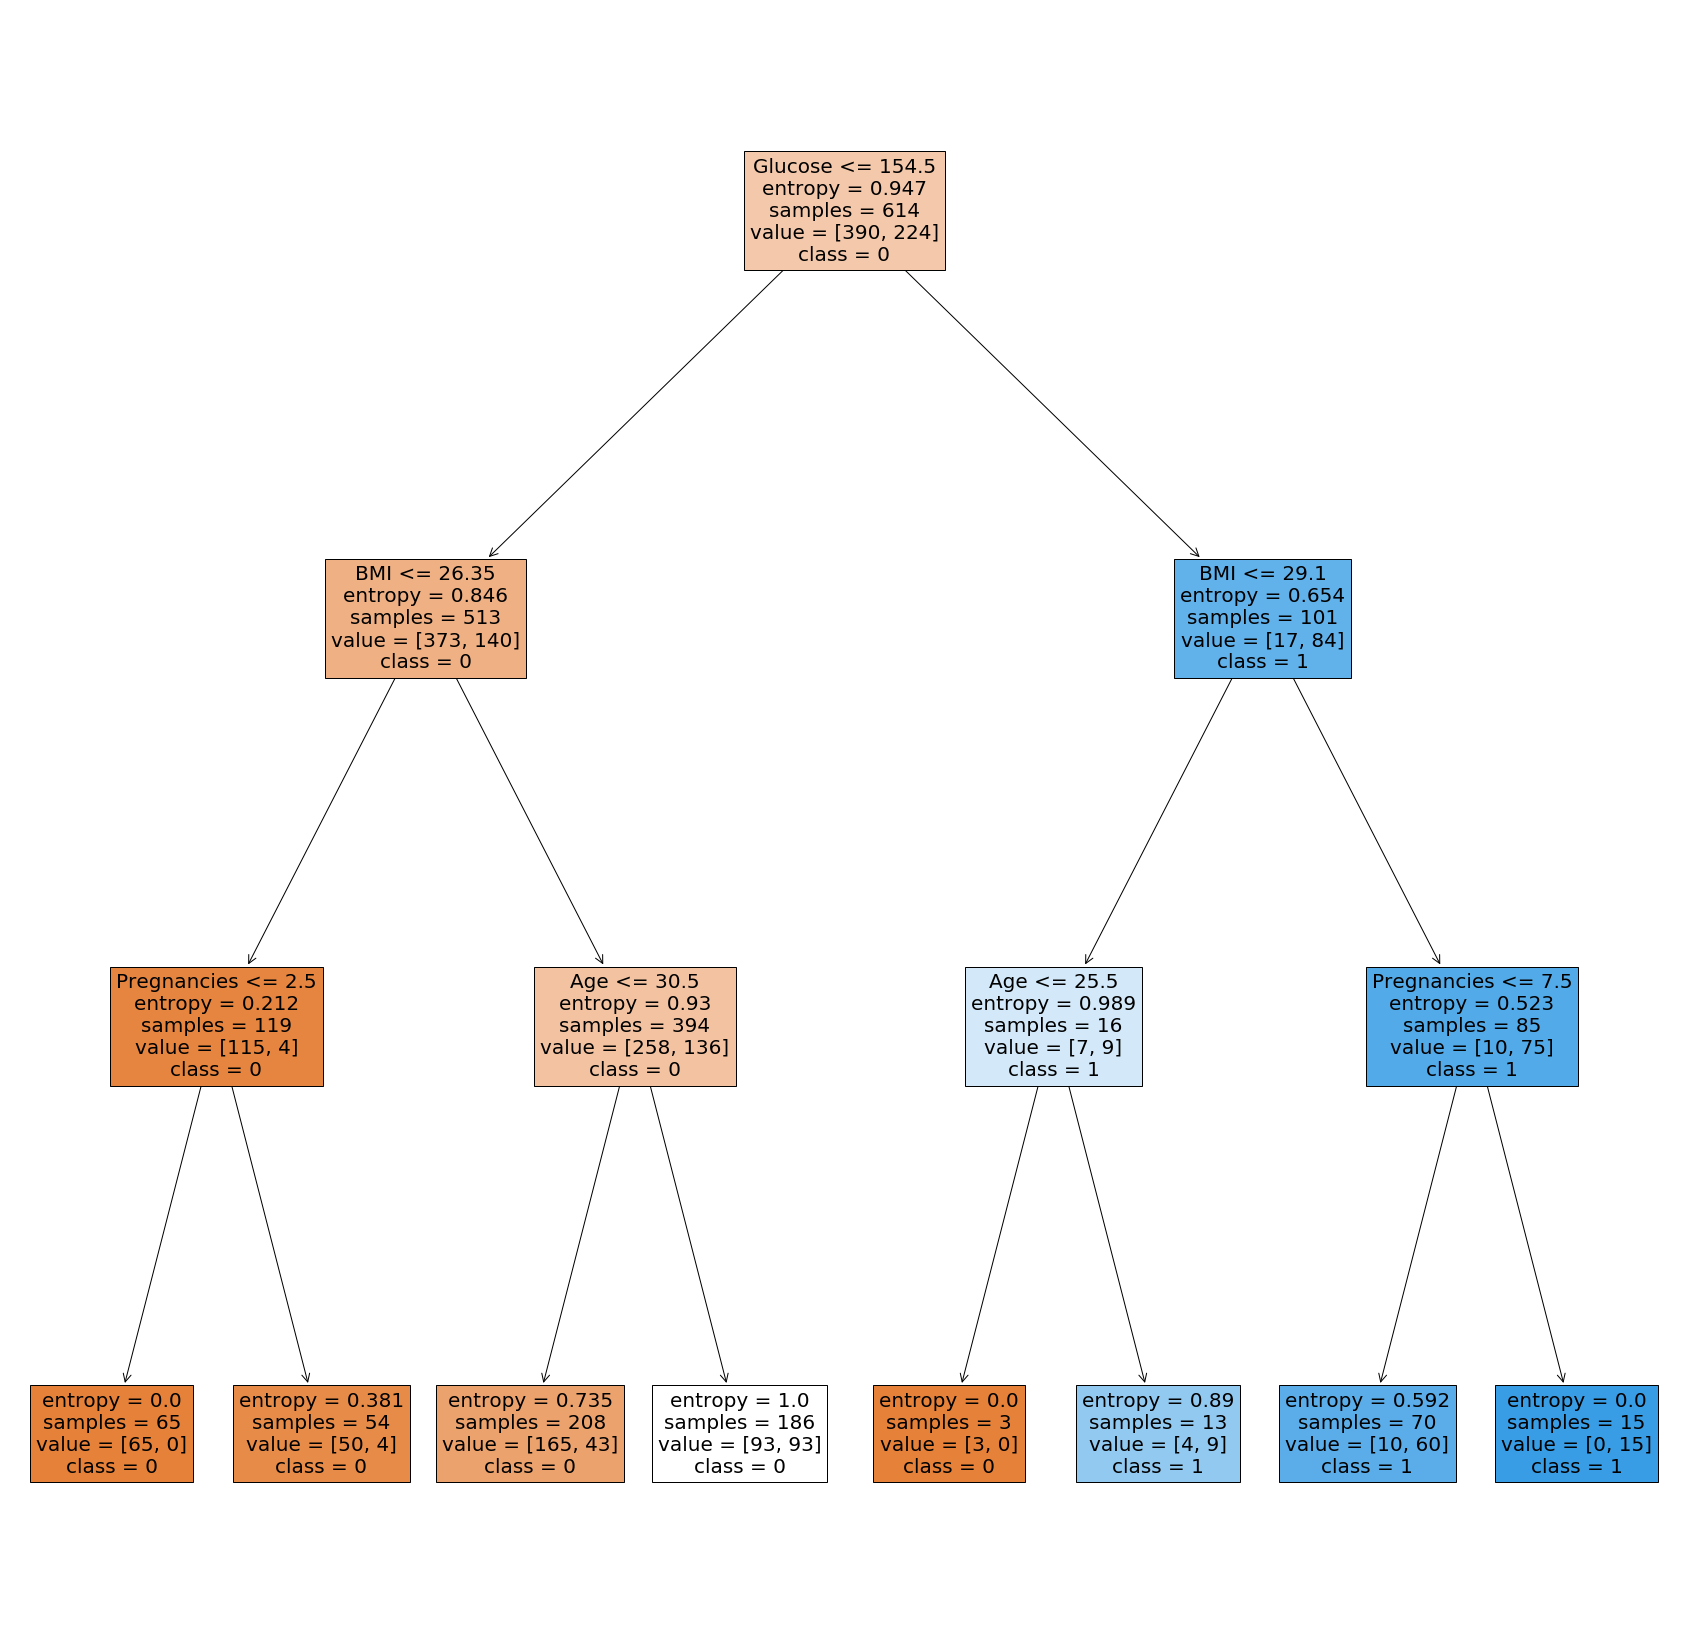

In [55]:
#1

Arbre1 = DecisionTreeClassifier(criterion = "entropy" , max_depth= 3)
Arbre1.fit(X_train,y_train)

Arbre2 = DecisionTreeClassifier(criterion = "gini" , max_depth= 3)
Arbre2.fit(X_train,y_train)

#2
plt.figure(figsize = (30,30))
plot_tree(Arbre1, filled=True, fontsize=20, feature_names= df.columns[:], class_names=['0','1'])


[Text(906.75, 1426.95, 'Glucose <= 154.5\ngini = 0.463\nsamples = 614\nvalue = [390, 224]\nclass = 0'),
 Text(558.0, 1019.25, 'Age <= 28.5\ngini = 0.397\nsamples = 513\nvalue = [373, 140]\nclass = 0'),
 Text(279.0, 611.55, 'Glucose <= 130.5\ngini = 0.232\nsamples = 261\nvalue = [226, 35]\nclass = 0'),
 Text(139.5, 203.8499999999999, 'gini = 0.163\nsamples = 224\nvalue = [204, 20]\nclass = 0'),
 Text(418.5, 203.8499999999999, 'gini = 0.482\nsamples = 37\nvalue = [22, 15]\nclass = 0'),
 Text(837.0, 611.55, 'BMI <= 26.35\ngini = 0.486\nsamples = 252\nvalue = [147, 105]\nclass = 0'),
 Text(697.5, 203.8499999999999, 'gini = 0.145\nsamples = 38\nvalue = [35, 3]\nclass = 0'),
 Text(976.5, 203.8499999999999, 'gini = 0.499\nsamples = 214\nvalue = [112, 102]\nclass = 0'),
 Text(1255.5, 1019.25, 'BMI <= 23.15\ngini = 0.28\nsamples = 101\nvalue = [17, 84]\nclass = 1'),
 Text(1116.0, 611.55, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(1395.0, 611.55, 'Age <= 66.5\ngini = 0.257\nsam

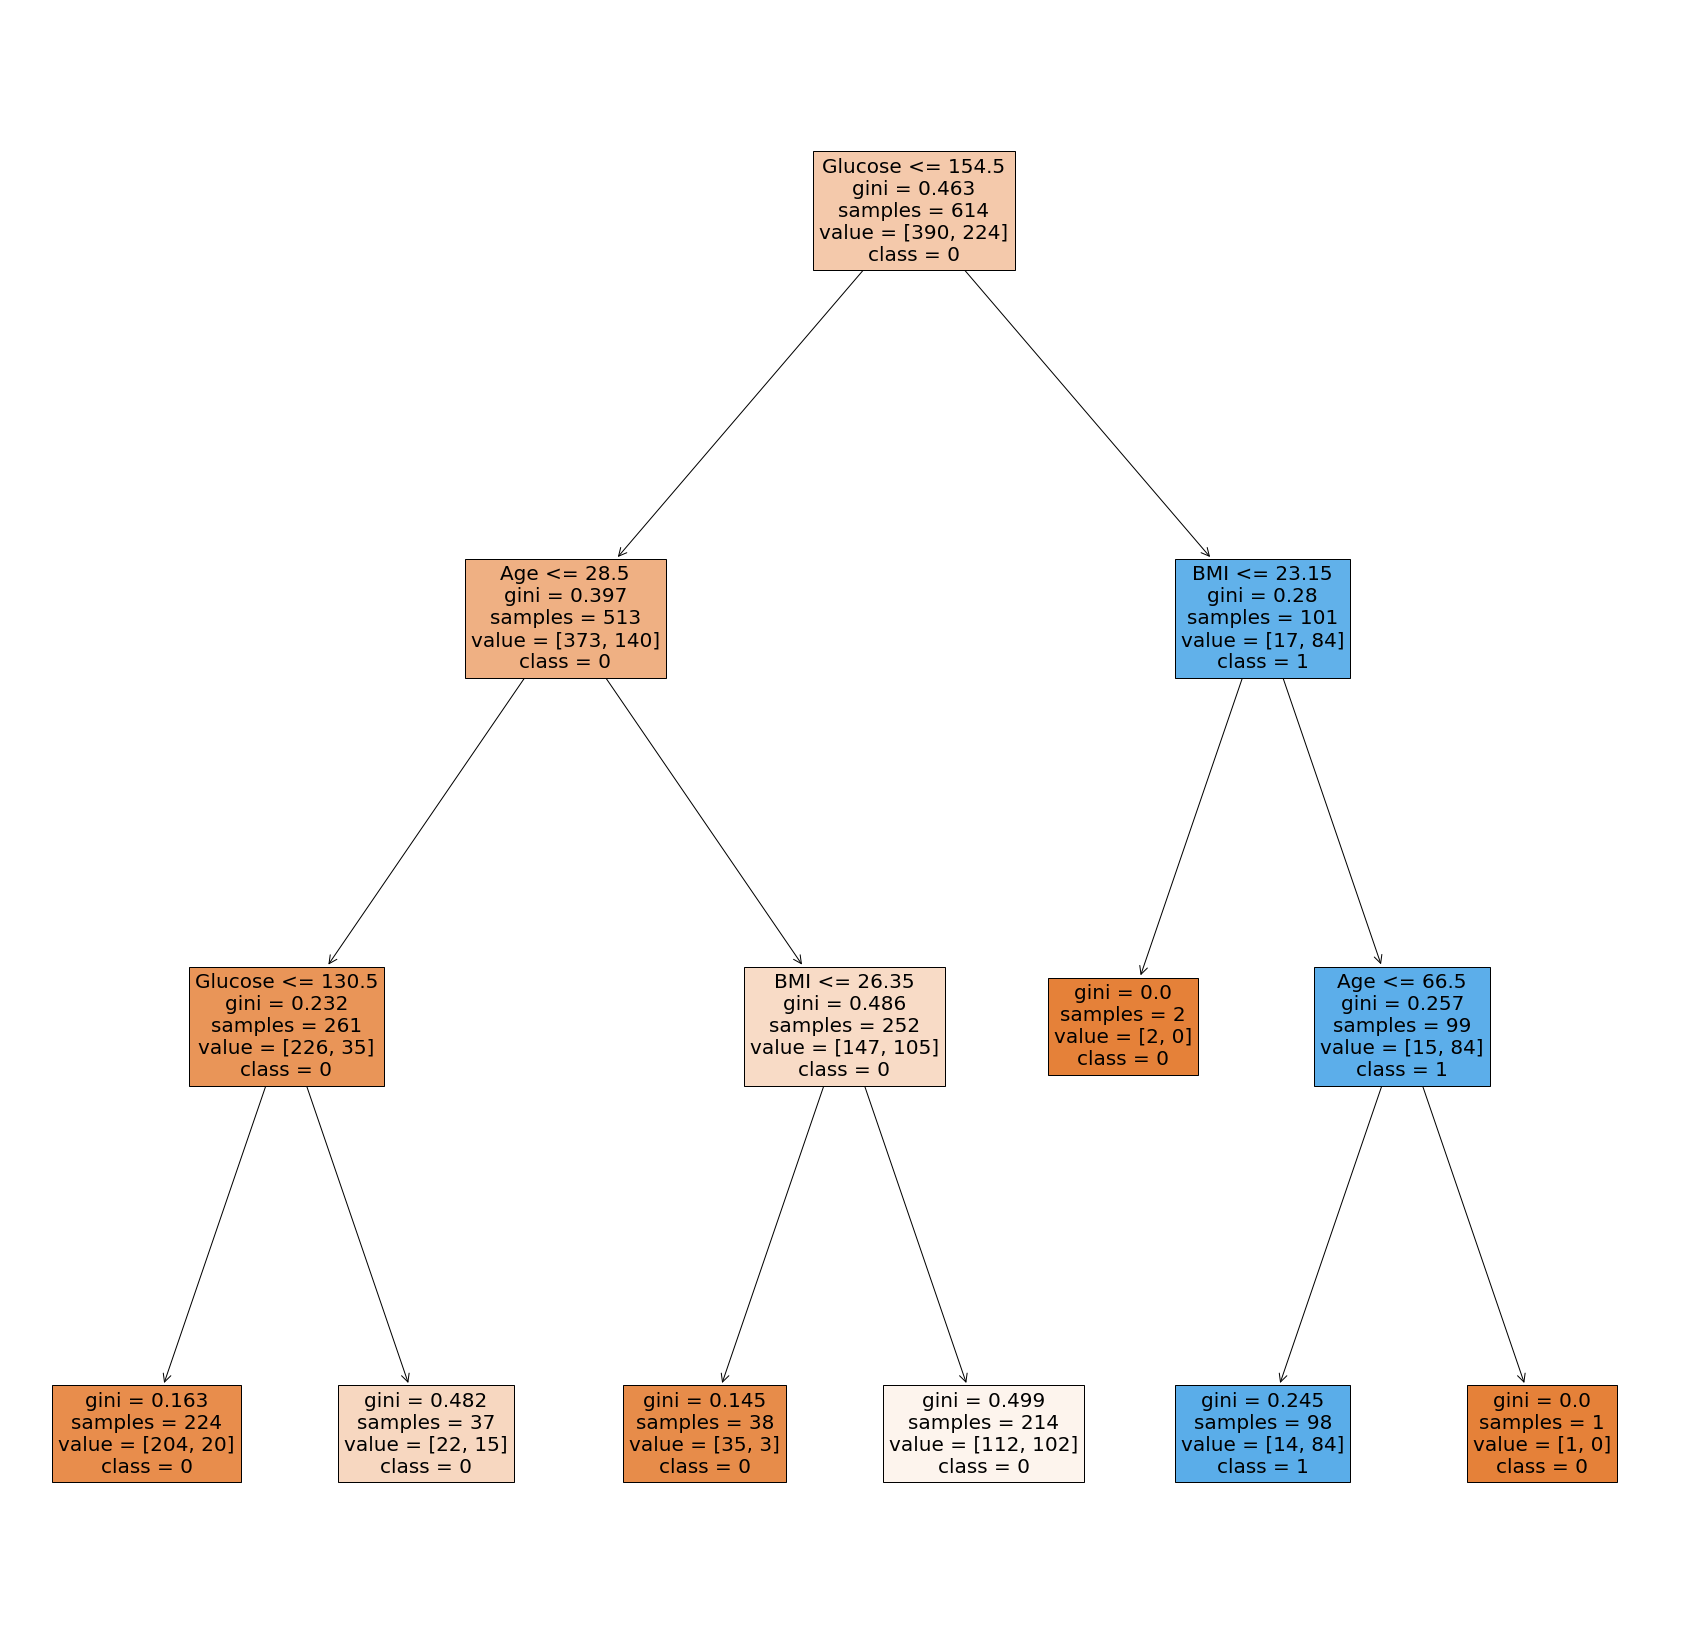

In [54]:
plt.figure(figsize = (30,30))
plot_tree(Arbre2, filled=True, fontsize=20, feature_names= df.columns[:], class_names=['0','1'])

#On remarque 

## Q7. peut-on réduire le nombre de caractèristiques utilisé dans ce modèle pour obtenir les même performances?


## Q8. utilisation du modèle
Mr Rachid a fait un bilon et a obtenu les resu Après un bilon Mr 
- Age: 22
- Glucose: 79
- BloodPressure: 69
- Insulin: 31
- BMI: 0.4

Mr Rachid a-t-il un diabéte?



In [64]:
data = pd.DataFrame({"Age":22, "Glucose":79, "BloodPressure":69, "Insulin":31, "BMI":0.4})
data



SyntaxError: invalid syntax (<ipython-input-64-7d5bdfe61741>, line 1)